# k-최근접 이웃 회귀

## 데이터 준비

In [8]:
import numpy as np

In [9]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

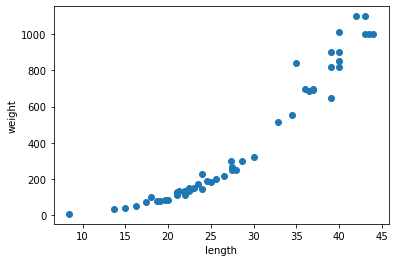

In [10]:
import matplotlib.pyplot as plt
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [11]:
# 훈련 세트와 테스트 세트로 나누기
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

In [12]:
# reshape() 메소드 사용 > 책 참고
# reshape(-1,1) 로 간편하게
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


## 결정계수 

In [13]:
# KNeighborsClassifier와 유사한 회귀 알고리즘
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()

# k-최근접 이웃 회귀 모델 훈련
knr.fit(train_input, train_target)

KNeighborsRegressor()

In [14]:
print(knr.score(test_input, test_target))

0.992809406101064


- 분류 : 테스트 세트의 샘플을 정확하게 분류한 개수의 비율 (정확도)
- 회귀 : 각 샘플의 타깃과 예측한 값의 차이를 제곱하여 더한 값

In [15]:
from sklearn.metrics import mean_absolute_error

# 테스트 세트에 대한 예측을 만든다.
test_prediction = knr.predict(test_input)

# 테스트 세트에 대한 평균 절댓값 오차를 계산한다.
mae = mean_absolute_error(test_target, test_prediction)
print(mae)

19.157142857142862


In [16]:
print(knr.score(train_input, train_target))

0.9698823289099254


## 과대적합 vs 과소적합
- 훈련 세트에서 점수가 굉장히 좋았는데 테스트 세트에서 점수가 굉장히 나쁜 경우 > 과대적합
- 훈련 세트보다 테스트 세트의 점수가 높거나 두 점수가 모두 너무 낮은 경우 > 과소 적합

위에서 확인할 수 있듯이, 훈련 세트보다 테스트 세트의 점수가 높으므로 과소적합이다. 이를 해결하기 위해 모델을 조금 더 복잡하게 만들어야 한다. 즉 훈련 세트에 더 잘 맞게 만들면 테스트 세트의 점수는 조금 낮아질 것이다. 방법은 이웃의 개수 k를 줄이는 것이다.

In [17]:
# 이웃의 개수를 3으로 설정
knr.n_neighbors = 3

# 모델을 다시 훈련
knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))  # k 값을 줄였더니 훈련 세트의 결정계수 점수가 높아졌다.
print(knr.score(test_input, test_target))  # 과소적합 문제 해결됨 확인.

0.9804899950518966
0.9746459963987609


## 확인 문제

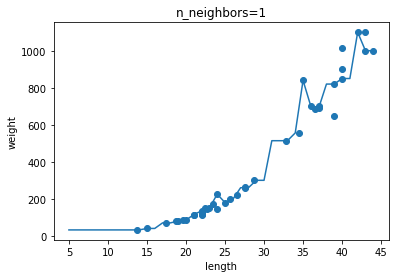

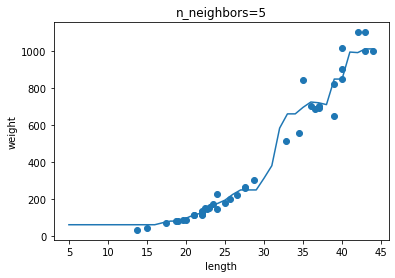

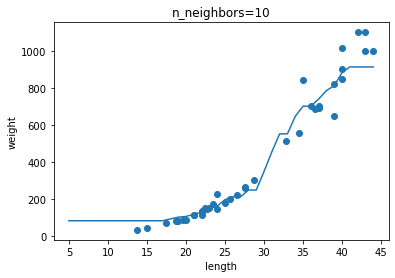

In [19]:
# k-최근접 이웃 회귀 객체를 만듭니다
knr = KNeighborsRegressor()
# 5에서 45까지 x조표를 만든다.
x = np.arange(5,45).reshape(-1,1)

# n = 1, 5, 10일 때 예측 결과를 그래프로 그린다.
for n in[1,5,10]:
    # 모델 훈련
    knr.n_neighbors = n
    knr.fit(train_input, train_target)
    # 지정한 범위 x에 대한 예측을 구한다.
    prediction = knr.predict(x)
    
    # 훈련 세트와 예측 결과를 그래프로 그린다.
    plt.scatter(train_input, train_target)
    plt.plot(x, prediction)
    plt.title('n_neighbors={}'.format(n))
    plt.xlabel('length')
    plt.ylabel('weight')
    plt.show()